In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve)

In [3]:
#Loading the dataset
data=pd.read_csv('data.csv')
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Before dropping columns:id, Unnamed: 32
print(data.columns.tolist())

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [5]:
#Dropping unrequired columns
data=data.drop(columns=['id', 'Unnamed: 32'])

In [6]:
#After dropping the columns
print(data.columns.tolist())

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
#Encoding the target variable i.e., M=1 (malignant), B=0(benign)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [8]:
#Now I'm splitting the data into features and target
x=data.drop('diagnosis',axis=1)
y=data['diagnosis']

In [9]:
#Splitting into train and test sets [80:20]
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [10]:
#Standardizing the feature values
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [11]:
#Training the model (logistic regression)
model=LogisticRegression(max_iter=1000)
model.fit(x_train_scaled,y_train)
#Here the max_iter is increased to avoid convergence warning

y_pred=model.predict(x_test_scaled)
y_prob=model.predict_proba(x_test_scaled)[:,1]

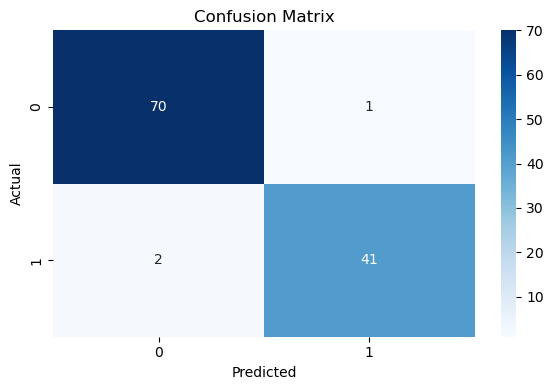

In [20]:
#Evaluating the model using confusion matrix
confs_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(confs_matrix, annot=True, fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('Confusion Matrix.png')
plt.show()

In [13]:
#Classification report and performance matrices
print('Classification Report:\n', classification_report(y_test,y_pred))
print('Accuracy score:',accuracy_score(y_test,y_pred))
print('ROC AUC score:',roc_auc_score(y_test,y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy score: 0.9736842105263158
ROC AUC score: 0.99737962659679


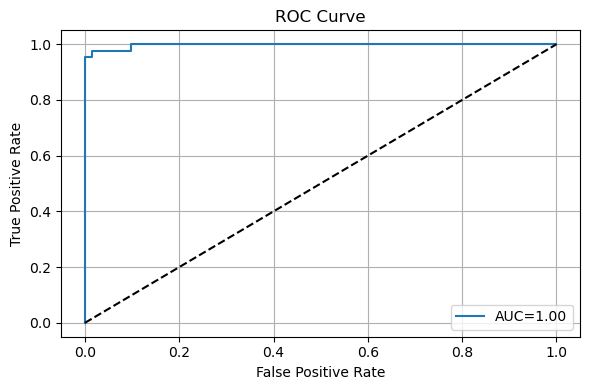

In [22]:
#Plotting ROC curve
fpr, tpr, thresholds=roc_curve(y_test,y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f'AUC={roc_auc_score(y_test,y_prob):.2f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('ROC_Curve.png')
plt.show()

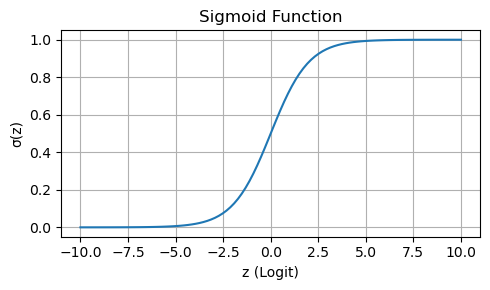

In [23]:
#Sigmoid function visualization
z=np.linspace(-10,10,100)
sigmoid=1/(1+np.exp(-z))
plt.figure(figsize=(5,3))
plt.plot(z,sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z (Logit)')
plt.ylabel('σ(z)')
plt.grid(True)
plt.tight_layout()
plt.savefig('Sigmoid Function')
plt.show()

In [17]:
#Threshold tuning example
custom_threshold=0.3
y_cust=(y_prob>=custom_threshold).astype(int)
print('Confusion matrix at 0.3 threshold:')
print(confusion_matrix(y_test,y_cust))
print('Classification report at 0.3 threshold:\n',classification_report(y_test,y_cust))

Confusion matrix at 0.3 threshold:
[[67  4]
 [ 1 42]]
Classification report at 0.3 threshold:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96        71
           1       0.91      0.98      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Confusion matrix at 0.3 threshold:
[[67  4]
 [ 1 42]]


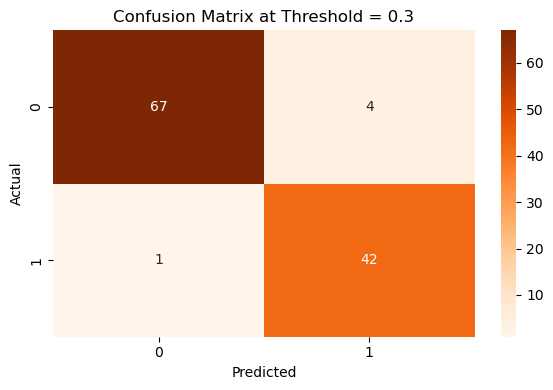

In [25]:
custom_threshold = 0.3
y_cust = (y_prob >= custom_threshold).astype(int)

# Confusion Matrix at custom threshold
confs_matrix_03 = confusion_matrix(y_test, y_cust)
print('Confusion matrix at 0.3 threshold:')
print(confs_matrix_03)

plt.figure(figsize=(6, 4))
sns.heatmap(confs_matrix_03, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix at Threshold = 0.3')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_threshold_0.3.png')  # Save the plot
plt.show()